## ML Assignment 3
### Team Members
#### 1. Safir Motiwala (2175052)
#### 2. Rajendra Kelwa (2175048)

### Question:
#### To do feature selection using Information gain and Forward Selection, and classify using SVC using rbf, poly and linear kernel

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_excel('Immunotherapy.xlsx')
X = dataset.drop(['Result_of_Treatment'], axis=1)
y = dataset['Result_of_Treatment']

In [6]:
print(dataset.head())

   sex  age   Time  Number_of_Warts  Type  Area  induration_diameter  \
0    1   22   2.25               14     3    51                   50   
1    1   15   3.00                2     3   900                   70   
2    1   16  10.50                2     1   100                   25   
3    1   27   4.50                9     3    80                   30   
4    1   20   8.00                6     1    45                    8   

   Result_of_Treatment  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  


#### Information Gain Feature Selection

In [7]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [8]:
mutual_info = mutual_info_classif(X.fillna(0), y)
mi_series = pd.Series(mutual_info)
mi_series.index = X.columns
mi_series.sort_values(ascending=False)

Type                   0.128820
Time                   0.126256
age                    0.016891
sex                    0.007967
induration_diameter    0.000000
Area                   0.000000
Number_of_Warts        0.000000
dtype: float64

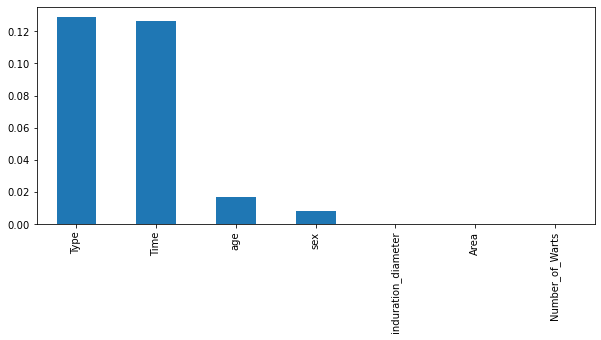

In [9]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(10,4))

In [10]:
k_best_features = SelectKBest(mutual_info_classif, k=5).fit(X.fillna(0), y)
print('Selected top 5 features: {}'.format(X.columns[k_best_features.get_support()]))
features_selected = X.columns[k_best_features.get_support()]

Selected top 5 features: Index(['age', 'Time', 'Type', 'Area', 'induration_diameter'], dtype='object')


#### Building model with features selected

In [11]:
X = dataset[features_selected].to_numpy()
y = y.to_numpy()

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

### Building SVC with Linear Kernel

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9



/home/safir/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Area under the Curve :  0.5
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.500


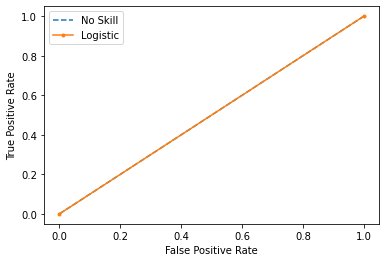

In [16]:
# ROC
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("Area under the Curve : ", auc)

# Plotting AUC (Area Under the Curve)
from sklearn.metrics import roc_auc_score, roc_curve
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Building SVC with Poly Kernel

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9



/home/safir/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Area under the Curve :  0.5
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.500


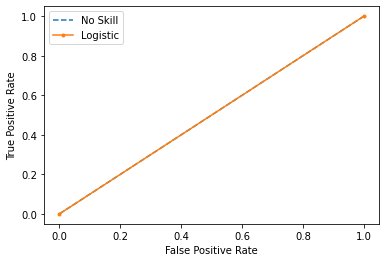

In [20]:
# ROC
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("Area under the Curve : ", auc)

# Plotting AUC (Area Under the Curve)
from sklearn.metrics import roc_auc_score, roc_curve
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Building SVC with rbf kernel

In [21]:
from sklearn.model_selection import GridSearchCV 
  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [22]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.765, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.812, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.812, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.812, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.812, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.765, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [23]:
print(grid.best_params_) 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [24]:
grid_predictions = grid.predict(X_test)

In [25]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         6

    accuracy                           0.78         9
   macro avg       0.88      0.67      0.68         9
weighted avg       0.83      0.78      0.74         9



Area under the Curve :  0.5
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.500


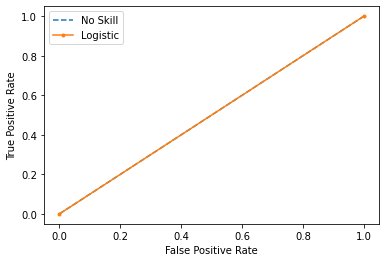

In [26]:
# ROC
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("Area under the Curve : ", auc)

# Plotting AUC (Area Under the Curve)
from sklearn.metrics import roc_auc_score, roc_curve
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Forward Feature Selection

In [27]:
X = dataset.drop(['Result_of_Treatment'], axis=1)
y = dataset['Result_of_Treatment']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train.shape, X_test.shape

((63, 7), (27, 7))

In [29]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [30]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

/home/safir/.local/lib/python3.8/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((63, 7), (27, 7))

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [35]:
from sklearn.svm import SVC
sfs1 = SFS(SVC(kernel='linear'), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

In [36]:
sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

AttributeError: k_features must be a positive integer between 1 and X.shape[1], got 10